In [4]:
import os, sys, time
print(sys.executable)

/usr/local/anaconda3/bin/python


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#pd.set_option('display.max_rows', 10)
import seaborn as sns
#sns.set_style("whitegrid")
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#%load_ext autotime

In [43]:
def clean_installer(df):

    df['installer'] = df['installer'].astype(str).str.lower()
    df['installer'].replace(
        to_replace=(
            'fini water', 'fin water', 'finn water', 'finwater', 'finwate'),
        value='finw', inplace=True)
    df['installer'].replace(to_replace=('jaica co'), value='jaica', inplace=True)
    df['installer'].replace(
        to_replace=(
            'district water department', 'district water depar', 'district council',
            'district counci', 'village council orpha','kibaha town council',
            'village council', 'coun', 'village counil', 'council',
            'mbulu district council', 'counc', 'village council .oda',
            'sangea district coun', 'songea district coun', 'villege council',
            'district  council', 'quick win project /council', 'mbozi district council',
            'village  council', 'municipal council', 'tabora municipal council',
            'wb / district council'),
        value='council', inplace=True)
    df['installer'].replace(
        to_replace=(
            'rc church', 'rc churc', 'rcchurch/cefa', 'irc', 'rc', 'rc ch', 'hw/rc',
            'rc church/central gover', 'kkkt church', 'pentecost church', 'roman church',
            'rc/mission', 'rc church/cefa', 'lutheran church', 'tag church',
            'free pentecoste church of tanz', 'rc c', 'church', 'rc cathoric',
            'morovian church', 'cefa/rc church', 'rc mission', 'anglican church',
            'church of disciples', 'anglikana church', 'cetral government /rc',
            'pentecostal church', 'cg/rc', 'rc missionary', 'sda church', 'methodist church', 'trc',
            'rc msufi', 'haidomu lutheran church', 'baptist church', 'rc church brother',
            'st magreth church', 'anglica church', 'global resource co', 'rc mi',
            'baptist church of tanzania', 'fpct church', 'rc njoro', 'rc .church',
            'rc mis', 'batist church', 'churc', 'dwe/anglican church','missi', 'mission',
            'ndanda missions', 'rc/mission', 'cvs miss', 'missionaries', 'hydom luthelani',
            'luthe', 'haydom lutheran hospital', 'lutheran', 'missio', 'germany missionary',
            'grail mission kiseki bar', 'missionary', 'heri mission', 'german missionsry',
            'wamissionari wa kikatoriki', 'neemia mission', 'wamisionari wa kikatoriki'),
        value='church', inplace=True)
    df['installer'].replace(
        to_replace=(
            'central government', 'gove', 'central govt', 'gover', 'cipro/government',
            'governme', 'adra /government', 'isf/government', 'adra/government',
            'government /tcrs', 'village govt', 'government', 'government /community',
            'concern /government', 'goverm', 'village government', 'cental government',
            'govern', 'cebtral government', 'government /sda', 'tcrs /government',
            'tanzania government', 'centra govt', 'colonial government', 'misri government',
            'government and community', 'cetral government /rc', 'concern/government',
            'government of misri', 'lwi &central government', 'governmen', 'government/tcrs', 'government /world vision',
            'centra government'),
        value='tanzanian government', inplace=True)
    df['installer'].replace(
        to_replace=(
            'world vission', 'world division', 'word divisio','world visiin'),
        value='world vision', inplace=True)
    df['installer'].replace(to_replace=('unicrf'), value='unicef', inplace=True)
    df['installer'].replace(
        to_replace=(
            'commu', 'olgilai village community', 'adra /community', 'adra/community',
            'rwe/ community', 'killflora /community', 'communit', 'taboma/community',
            'arab community', 'adra/ community', 'sekei village community', 'rwe/community',
            'arabs community', 'village community', 'government /community',
            'dads/village community', 'killflora/ community', 'mtuwasa and community',
            'rwe /community', 'ilwilo community', 'summit for water/community',
            'igolola community', 'ngiresi village community', 'rwe community',
            'african realief committe of ku', 'twesa /community', 'shelisheli commission',
            'twesa/ community', 'marumbo community', 'government and community',
            'community bank', 'kitiangare village community', 'oldadai village community',
            'twesa/community', 'tlc/community', 'maseka community', 'islamic community',
            'district community j', 'village water commission', 'village community members',
            'tcrs/village community', 'village water committee', 'comunity'),
        value='community', inplace=True)
    df['installer'].replace(
        to_replace=(
            'danid', 'danda','danida co', 'danny', 'daniad', 'dannida', 'danids'),
        value='danida', inplace=True)
    df['installer'].replace(
        to_replace=(
            'hesaws', 'huches', 'hesaw', 'hesawz', 'hesawq', 'hesewa'),
        value='hesawa', inplace=True)
    df['installer'].replace(
        to_replace=(
            'dwsp', 'kkkt _ konde and dwe', 'rwe/dwe', 'rwedwe', 'dwe/', 'dw', 'dwr',
            'dwe}', 'dwt', 'dwe /tassaf', 'dwe/ubalozi wa marekani', 'consultant and dwe',
            'dwe & lwi', 'ubalozi wa marekani /dwe', 'dwe&', 'dwe/tassaf', 'dw$',
            'dw e', 'tcrs/dwe', 'dw#', 'dweb', 'tcrs /dwe', 'water aid/dwe', 'dww'),
        value='dwe', inplace=True)
    df['installer'].replace(
        to_replace=(
            'africa muslim', 'muslimu society(shia)', 'africa muslim agenc',
            'african muslims age', 'muslimehefen international','islamic',
            'the isla', 'islamic agency tanzania',  'islam', 'nyabibuye islamic center'),
        value='muslims', inplace=True)
    df['installer'].replace(
        to_replace=(
            'british colonial government', 'british government', 'britain'),
        value='british', inplace=True)
    df['installer'].replace(
        to_replace=(
            'tcrs/tlc', 'tcrs /care', 'cipro/care/tcrs', 'tcrs kibondo', 'tcrs.tlc',
            'tcrs /twesa', 'tassaf /tcrs', 'tcrs/care', 'tcrs twesa', 'rwe/tcrs',
            'tcrs/twesa', 'tassaf/ tcrs', 'tcrs/ tassaf', 'tcrs/ twesa', 'tcrs a',
            'tassaf/tcrs'),
        value='tcrs', inplace=True)
    df['installer'].replace(
        to_replace=(
            'kkkt-dioces ya pare', 'kkkt leguruki', 'kkkt ndrumangeni', 'kkkt dme',
            'kkkt kilinga', 'kkkt canal', 'kkkt katiti juu', 'kkkt mareu'),
        value='kkkt', inplace=True)
    df['installer'].replace(to_replace=('norad/'), value='norad', inplace=True)
    df['installer'].replace( to_replace=('tasaf/dmdd', 'dmdd/solider'),
        value='dmdd', inplace=True)
    df['installer'].replace(
        to_replace=('cjejow construction', 'cjej0'), value='cjejow', inplace=True)
    df['installer'].replace(
        to_replace=(
            'china henan constuction', 'china henan contractor', 'china co.', 'chinese'),
        value='china', inplace=True)
    df['installer'].replace(
        to_replace=(
            'local contract', 'local technician', 'local', 'local  technician',
            'locall technician', 'local te', 'local technitian', 'local technical tec',
            'local fundi', 'local technical', 'localtechnician', 'village local contractor',
            'local l technician'),
        value='local', inplace=True)
    df['installer'].replace(
        to_replace=(
            'oikos e .africa', 'oikos e.africa', 'africa amini alama',
            'africa islamic agency tanzania', 'africare', 'african development foundation',
            'oikos e. africa', 'oikos e.afrika', 'afroz ismail', 'africa', 'farm-africa',
            'oikos e africa', 'farm africa', 'africaone', 'tina/africare', 'africaone ltd',
            'african reflections foundation', 'africa m'),
        value='africa', inplace=True)
    df['installer'].replace(to_replace=('0', 'nan', '-'), value='other', inplace=True)
    df_installer_cnt = df.groupby('installer')['installer'].count()
    other_list = df_installer_cnt[df_installer_cnt<71].index.tolist()
    df['installer'].replace(to_replace=other_list, value='other', inplace=True)

In [44]:
def clean_funder(df):
    
    df['funder'] = df['funder'].astype(str).str.lower()
    df['funder'].replace(
        to_replace=(
            'kkkt_makwale', 'kkkt-dioces ya pare', 'world vision/ kkkt', 'kkkt church',
            'kkkt leguruki', 'kkkt ndrumangeni', 'kkkt dme', 'kkkt canal', 'kkkt usa',
            'kkkt mareu'),
        value='kkkt', inplace=True)
    df['funder'].replace(
        to_replace=(
            'government of tanzania', 'norad /government', 'government/ community',
            'cipro/government', 'isf/government', 'finidagermantanzania govt',
            'government /tassaf', 'finida german tanzania govt', 'village government',
            'tcrs /government', 'village govt', 'government/ world bank',
            'danida /government', 'dhv/gove', 'concern /govern', 'vgovernment',
            'lwi & central government', 'government /sda', 'koica and tanzania government',
            'world bank/government', 'colonial government', 'misri government',
            'government and community', 'concern/governm', 'government of misri',
            'government/tassaf', 'government/school', 'government/tcrs', 'unhcr/government',
            'government /world vision', 'norad/government'),
        value='government', inplace=True)
    df['funder'].replace(
        to_replace=(
            'british colonial government', 'japan government', 'china government',
            'finland government', 'belgian government', 'italy government',
            'irish government', 'egypt government', 'iran gover', 'swedish', 'finland'),
        value='foreign government', inplace=True)
    df['funder'].replace(
        to_replace=(
            'rc church', 'anglican church', 'rc churc', 'rc ch', 'rcchurch/cefa',
            'irc', 'rc', 'churc', 'hw/rc', 'rc church/centr', 'pentecosta church',
            'roman church', 'rc/mission', "ju-sarang church' and bugango",
            'lutheran church', 'roman cathoric church', 'tag church ub', 'aic church',
            'free pentecoste church of tanz', 'tag church', 'fpct church', 'rc cathoric',
            'baptist church', 'morovian church', 'cefa/rcchurch', 'rc mission',
            'bukwang church saints', 'agt church', 'church of disciples', 'rc mofu',
            "gil cafe'church'", 'pentecostal church', 'bukwang church saint',
            'eung am methodist church', 'rc/dwe', 'cg/rc', 'eung-am methodist church',
            'rc missionary', 'sda church', 'methodist church', 'rc msufi',
            'haidomu lutheran church', 'nazareth church', 'st magreth church',
            'agape churc', 'rc missi', 'rc mi', 'rc njoro', 'world vision/rc church',
            'pag church', 'batist church', 'full gospel church', 'nazalet church',
            'dwe/anglican church', 'missi', 'mission', 'missionaries', 'cpps mission',
            'cvs miss', 'grail mission kiseki bar', 'shelisheli commission', 'missionary',
            'heri mission', 'german missionary', 'wamissionari wa kikatoriki',
            'rc missionary', 'germany missionary', 'missio', 'neemia mission', 'rc missi',
            'hydom luthelani', 'luthe', 'lutheran church',  'haydom lutheran hospital',
            'village council/ haydom luther', 'lutheran', 'haidomu lutheran church',
            'resolute golden pride project', 'resolute mininggolden pride',
            'germany cristians'),
        value='church', inplace=True)
    df['funder'].replace(
        to_replace=(
            'olgilai village community', 'commu', 'community', 'arab community',
            'sekei village community', 'arabs community', 'village community',
            'mtuwasa and community', 'ilwilo community', 'igolola community',
            'ngiresi village community', 'marumbo community', 'village communi',
            'comune di roma', 'comunity construction fund', 'community bank',
            "oak'zion' and bugango b' commu", 'kitiangare village community',
            'oldadai village community', 'tlc/community', 'maseka community',
            'islamic community',  'tcrs/village community', 'buluga subvillage community',
            'okutu village community'),
        value='community', inplace=True)
    df['funder'].replace(
        to_replace=(
            'council', 'wb / district council', 'cdtfdistrict council',
            'sangea district council', 'mheza distric counc', 'kyela council',
            'kibaha town council', 'swidish', 'mbozi district council', 
            'village council/ rose kawala',  'songea municipal counci',
            'quick win project /council', 'village council', 'villege council',
            'tabora municipal council', 'kilindi district co', 'kigoma municipal council',
            'district council', 'municipal council', 'district medical',
            'sengerema district council', 'town council', 'mkinga  distric cou',
            'songea district council', 'district rural project', 'mkinga distric coun',
            'dadis'),
        value='district', inplace=True)
    df['funder'].replace(
        to_replace=(
            'tcrs.tlc', 'tcrs /care', 'tcrst', 'cipro/care/tcrs', 'tcrs/care', 'tcrs kibondo'),
        value='tcrs', inplace=True)
    df['funder'].replace(
        to_replace=(
            'fini water', 'finw', 'fin water', 'finn water', 'finwater'),
        value='fini', inplace=True)
    df['funder'].replace(
        to_replace=(
            'islamic', 'the isla', 'islamic found', 'islamic agency tanzania',
            'islam', 'muislam', 'the islamic', 'nyabibuye islamic center', 'islamic society', 'african muslim agency',
            'muslims', 'answeer muslim grou', 'muslimu society(shia)',
            'unicef/african muslim agency', 'muslim world', 'muslimehefen international',
            'shear muslim', 'muslim society'),
        value='islam', inplace=True)
    df['funder'].replace(
        to_replace=('danida', 'ms-danish', 'unhcr/danida', 'tassaf/ danida'),
        value='danida', inplace=True)
    df['funder'].replace(
        to_replace=(
            'hesawa', 'hesawz', 'hesaw', 'hhesawa', 'hesawwa', 'hesawza', 'hesswa',
            'hesawa and concern world wide'),
        value='hesawa', inplace=True)
    df['funder'].replace(
        to_replace=('world vision/adra', 'game division', 'worldvision'),
        value='world vision', inplace=True)
    df['funder'].replace(
        to_replace=(
            'germany republi', 'a/co germany', 'aco/germany', 'bingo foundation germany',
            'africa project ev germany', 'tree ways german'),
        value='germany', inplace=True)
    df['funder'].replace(to_replace=('0', 'nan', '-'), value='other', inplace=True)
    df_funder_cnt = df.groupby('funder')['funder'].count()
    other_list = df_funder_cnt[df_funder_cnt<98].index.tolist()
    df['funder'].replace(to_replace=other_list, value='other', inplace=True)    

In [6]:
df_data = pd.read_csv("Data_train.csv")
df_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
df_labels = pd.read_csv("Data_train_labels.csv")
df_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [8]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
id              59400 non-null int64
status_group    59400 non-null object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [10]:
df = pd.merge(df_data,df_labels,how='inner',left_on='id', right_on='id')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [11]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [12]:
df_data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [13]:
df.scheme_name.value_counts()

K                      682
None                   644
Borehole               546
Chalinze wate          405
M                      400
                      ... 
Kilimb                   1
Mnazi moja               1
Mtunguruzi               1
Kizimba forest           1
Magoma water suoply      1
Name: scheme_name, Length: 2696, dtype: int64

In [14]:
#fig, axes = plt.subplots(ncols=5, nrows=8, figsize=(15, 10))
#fig.set_tight_layout(True)

#for index, col in enumerate(df.columns):
#    ax = axes[index//5][index%5]
#    ax.hist(df[col], bins='auto')
#    ax.set_xlabel(col)
#    ax.set_ylabel("Counts")

In [15]:
#df.hist(bins='auto', edgecolor='none', figsize=(14,14));

<AxesSubplot:xlabel='region', ylabel='count'>

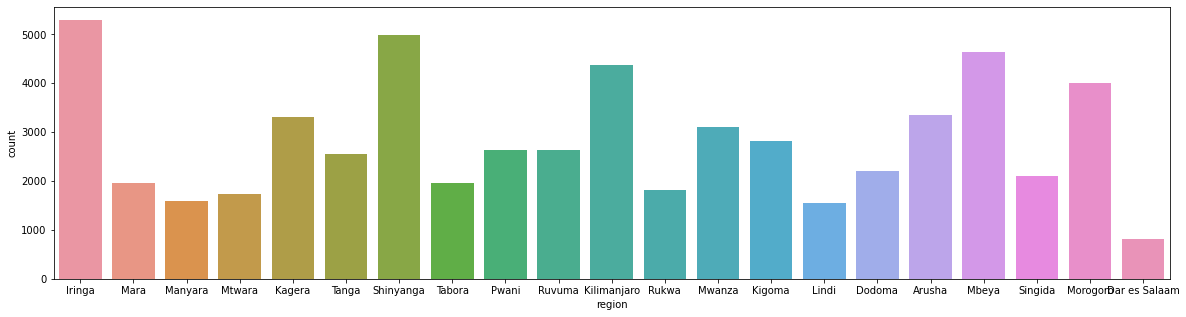

In [16]:
fig, ax = plt.subplots(figsize=(20, 5))
#sns.histplot(df['region_code'])
sns.countplot(data=df, x="region")#, hue="alive")

In [17]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [18]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [19]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [20]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [21]:
df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [22]:
# Which one of these variables are encoded in string format?
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['id', 'gps_height', 'num_private', 'region_code', 'district_code',
        'population', 'construction_year'],
       dtype='object'),
 dtype('float64'): Index(['amount_tsh', 'longitude', 'latitude'], dtype='object'),
 dtype('O'): Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
        'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
        'scheme_management', 'scheme_name', 'permit', 'extraction_type',
        'extraction_type_group', 'extraction_type_class', 'management',
        'management_group', 'payment', 'payment_type', 'water_quality',
        'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
        'source_class', 'waterpoint_type', 'waterpoint_type_group',
        'status_group'],
       dtype='object')}

In [23]:
df_ana = df.copy()

In [24]:
df_ana=df_ana.drop(columns=['num_private','waterpoint_type_group'],axis=1)

In [25]:
df_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 39 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null object


In [26]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [27]:
df['scheme_name'].value_counts()

K                      682
None                   644
Borehole               546
Chalinze wate          405
M                      400
                      ... 
Kilimb                   1
Mnazi moja               1
Mtunguruzi               1
Kizimba forest           1
Magoma water suoply      1
Name: scheme_name, Length: 2696, dtype: int64

In [28]:
df['funder'].value_counts()

Government Of Tanzania      9084
Danida                      3114
Hesawa                      2202
Rwssp                       1374
World Bank                  1349
                            ... 
Mafwimbo                       1
Eung Am Methodist Church       1
Rv                             1
Laizer                         1
Brad                           1
Name: funder, Length: 1897, dtype: int64

In [29]:
df['installer'].value_counts()

DWE                         17402
Government                   1825
RWE                          1206
Commu                        1060
DANIDA                       1050
                            ...  
Mwamvita Rajabu                 1
SAFARI CAMP                     1
Grail Mission Kiseki bar        1
Tarangire park                  1
Mombo urban  water              1
Name: installer, Length: 2145, dtype: int64

In [30]:
#df_ana=df_ana.drop(columns=['scheme_name'],axis=1)# drop for now as too many misssing values

In [54]:
plt.show()

In [62]:
df_ana["status_group"].isna().sum()

0

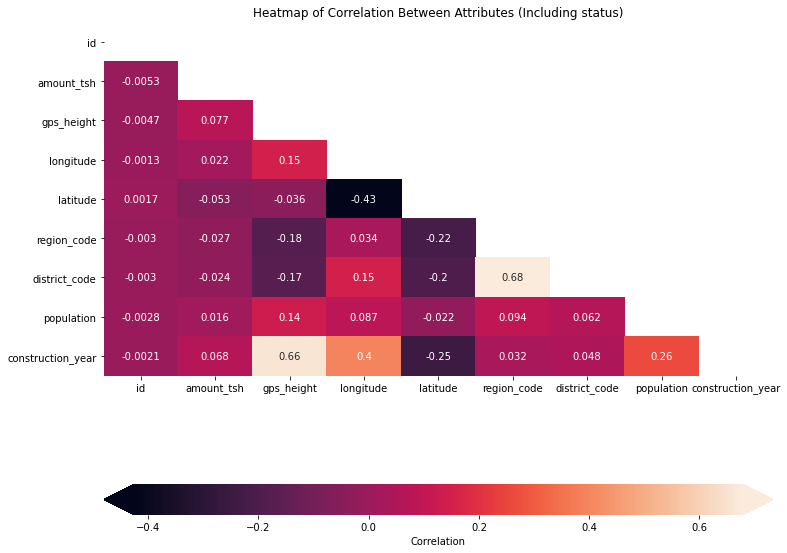

In [34]:
# Create a df with the target as the first column,
# then compute the correlation matrix
#heatmap_data = df[features_numeric]
corr = df_ana.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including status)");

In [35]:
df_ana.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['id', 'gps_height', 'region_code', 'district_code', 'population',
        'construction_year'],
       dtype='object'),
 dtype('float64'): Index(['amount_tsh', 'longitude', 'latitude'], dtype='object'),
 dtype('O'): Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
        'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
        'scheme_management', 'scheme_name', 'permit', 'extraction_type',
        'extraction_type_group', 'extraction_type_class', 'management',
        'management_group', 'payment', 'payment_type', 'water_quality',
        'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
        'source_class', 'waterpoint_type', 'status_group'],
       dtype='object')}

In [36]:
features_numerical=['id', 'gps_height', 'region_code', 'district_code',\
                    'population', 'construction_year','amount_tsh',\
                    'longitude', 'latitude']

In [37]:
features_categorical=['date_recorded', 'funder', 'installer', 'wpt_name', 'basin']#,\
                      #'subvillage', 'region', 'lga', 'ward', 'public_meeting',\
                      #'recorded_by', 'scheme_management', 'permit', 'extraction_type',\
                      #'extraction_type_group', 'extraction_type_class', 'management',\
                      #'management_group', 'payment', 'payment_type', 'water_quality',\
                      #'quality_group', 'quantity', 'quantity_group', 'source',\
                      #'source_type', 'source_class', 'waterpoint_type', 'status_group']

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10,8),constrained_layout=True)

for col, ax in zip(features_numerical, axes.flatten()):
    (df_ana.groupby(col)               # group values together by column of interest
         .count()['status_group']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .hist(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)              # Make the title the name of the column
    ax.grid(True, color = 'DarkTurquoise', alpha=1, linestyle = '--', linewidth = 0.5)
    
fig.tight_layout()

In [45]:
clean_installer(df_ana)

In [46]:
clean_funder(df_ana)

In [ ]:
df_test=pd.DataFrame(df_ana[['region','status_group']].groupby(['region','status_group']).agg(({'status_group': ['count']})))
df_test

In [ ]:
df_test.columns = ['_'.join(col) for col in df_test.columns.values]
df_test= df_test.reset_index()

In [ ]:
df_test

In [89]:
sortedDF=df_test.sort_values('status_group_count', ascending=False)
sortedDF

,region,status_group,status_group_count
9,Iringa,0,4141
51,Shinyanga,0,2789
18,Kilimanjaro,0,2640
30,Mbeya,0,2319
0,Arusha,0,2294
...,...,...,...
62,Tanga,2,73
29,Mara,2,60
59,Tabora,2,45
44,Pwani,2,36


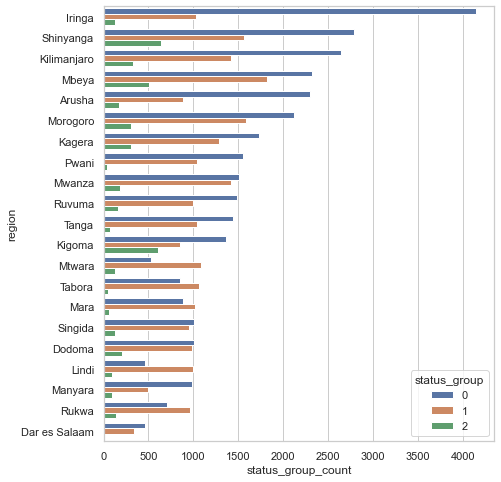

In [111]:
#sns.set_theme(style='whitegrid')
plt.rcParams.update({'font.size': 20})
fig,ax = plt.subplots(figsize=(7,8))
ax=sns.barplot(y='region', x='status_group_count', data=sortedDF, hue='status_group',orient='h')
#sns.despine(left=True, bottom=True)

In [112]:
df_ana.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [113]:
df_ana.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [116]:
df_ana.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [118]:
df_ana=df_ana.drop('extraction_type_group',axis=1)

In [119]:
df_ext = pd.DataFrame(df_ana[['extraction_type_class','status_group']]\
                      .groupby(['extraction_type_class','status_group'])\
                      .agg(({'status_group': ['count']})))
df_ext

status_group
                                          count
extraction_type_class status_group             
gravity               0                   16048
                      1                    8031
                      2                    2701
handpump              0                   10375
                      1                    5086
                      2                     995
motorpump             0                    1135
                      1                    1714
                      2                     138
other                 0                    1029
                      1                    5195
                      2                     206
rope pump             0                     293
                      1                     141
                      2                      17
submersible           0                    3329
                      1                    2597
                      2                     253
wind-powered          0                      50
                      1                      60
                      2                       7

In [120]:
df_ext.columns = ['_'.join(col) for col in df_ext.columns.values]
df_ext= df_ext.reset_index()

In [121]:
df_ext

,extraction_type_class,status_group,status_group_count
0,gravity,0,16048
1,gravity,1,8031
2,gravity,2,2701
3,handpump,0,10375
4,handpump,1,5086
5,handpump,2,995
6,motorpump,0,1135
7,motorpump,1,1714
8,motorpump,2,138
9,other,0,1029


In [123]:
sortedEX=df_ext.sort_values('status_group_count', ascending=False)
sortedEX

,extraction_type_class,status_group,status_group_count
0,gravity,0,16048
3,handpump,0,10375
1,gravity,1,8031
10,other,1,5195
4,handpump,1,5086
15,submersible,0,3329
2,gravity,2,2701
16,submersible,1,2597
7,motorpump,1,1714
6,motorpump,0,1135


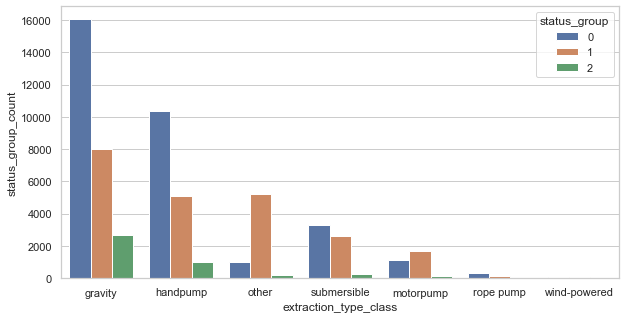

In [133]:
fig,ax1 = plt.subplots(figsize=(10,5))
ax1=sns.barplot(x='extraction_type_class', y='status_group_count',\
               data=sortedEX, hue='status_group')

In [128]:
df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [127]:
df_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [134]:
df_ana.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [135]:
df_ana.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [136]:
df_ana=df_ana.drop('quantity_group',axis=1)

In [137]:
df_ana.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [138]:
df_ana.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [140]:
df_ana=df_ana.drop('quality_group',axis=1)

In [141]:
df_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [143]:
df_ana['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [144]:
df_ana.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [145]:
df_ana.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [147]:
df_ana= df_ana.drop('payment_type',axis=1)

In [148]:
df_ana['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [149]:
df_ana.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [151]:
df.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [154]:
11075+874

11949

In [152]:
df.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [153]:
df.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [155]:
df_ana=df_ana.drop('source_type',axis=1)

In [156]:
df_ana.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [157]:
df_ana.region_code.value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [158]:
df_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [285]:
df_ana.wpt_name.value_counts().count()

37400

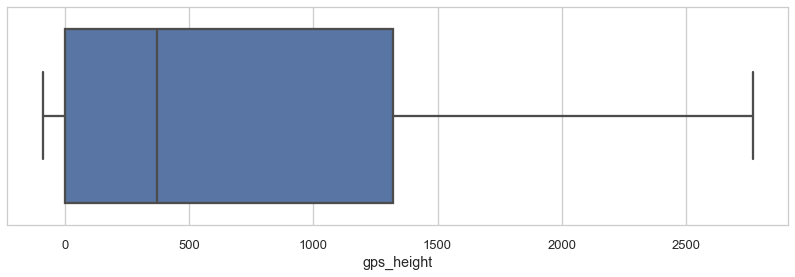

In [248]:
with plt.style.context('seaborn-talk'):
    fig, ax  = plt.subplots(figsize=(14, 4))
    sns.boxplot(x = df_ana['gps_height'], ax=ax);

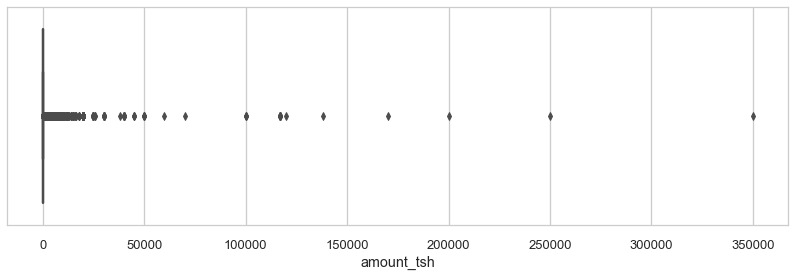

In [215]:
#df_ana.amount_tsh.hist(bins='auto')
with plt.style.context('seaborn-talk'):
    fig, ax  = plt.subplots(figsize=(14, 4))
    sns.boxplot(x = df_ana['amount_tsh'], ax=ax);

In [ ]:
df_ana.describe()

In [241]:
df_ana['amount_tsh'].quantile(.99)

5000.0

In [251]:
# Code copied from: https://stackoverflow.com/questions/61330427/set-y-axis-in-millions and modified a bit. 
# Use the function below to get rid of 1e8s etc on graphs and to format numbers in thousands, millions, etc in visualizations..:

from matplotlib.ticker import FuncFormatter

def human_format(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '$%.0f%s' % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])

formatter = FuncFormatter(human_format)


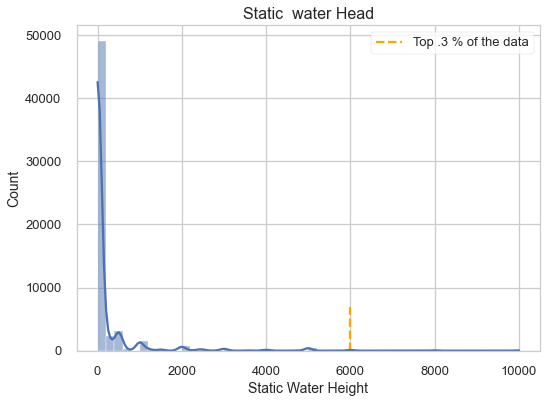

In [279]:
with plt.style.context('seaborn-talk'):
    fig, ax  = plt.subplots(figsize=(8, 6))

    sns.histplot(x = df_ana_new['amount_tsh'], bins=50, ax=ax, kde =True)
    #ax.xaxis.set_major_formatter(formatter)
    #plt.ylim(0, 7000)
    ax.set_title('Static  water Head', fontsize=16)
    ax.set_xlabel("Static Water Height", fontsize=14)
    ax.set_ylabel("Count", fontsize=14)
    ax.vlines(df_ana_new['amount_tsh'].quantile(0.997), 0, 6900, color= 'orange', linestyle='--', label = "Top .3 % of the data")
    ax.legend(loc = 'upper right')
    fig.tight_layout();
    
    #fig.savefig('./images/Histogram_DependentMeasure.png', dpi=300)

In [380]:
#df_ana_new['log_amt_tsh']=np.log(df_ana_new['amount_tsh'])
#df_ana_new['log_amt_tsh'].value_counts()

-inf         41639
 6.214608     3102
 3.912023     2472
 6.907755     1488
 2.995732     1463
             ...  
 6.802395        1
 7.244228        1
-1.386294        1
 3.258097        1
 9.047821        1
Name: log_amt_tsh, Length: 72, dtype: int64

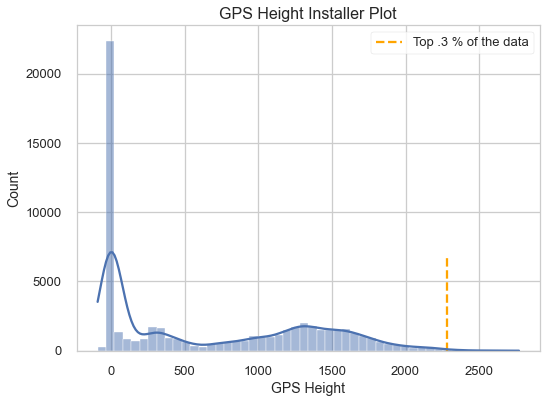

In [371]:
with plt.style.context('seaborn-talk'):
    fig, ax  = plt.subplots(figsize=(8, 6))

    sns.histplot(x = df_ana_new['gps_height'], bins=50, ax=ax, kde =True)
    #ax.xaxis.set_major_formatter(formatter)
    #plt.ylim(0, 7000)
    ax.set_title('GPS Height Installer Plot', fontsize=16)
    ax.set_xlabel("GPS Height", fontsize=14)
    ax.set_ylabel("Count", fontsize=14)
    ax.vlines(df_ana_new['gps_height'].quantile(0.997), 0, 6900, color= 'orange', linestyle='--', label = "Top .3 % of the data")
    ax.legend(loc = 'upper right')
    fig.tight_layout();
    
    #fig.savefig('./images/Histogram_DependentMeasure.png', dpi=300)

In [277]:
oldshape=df_ana.shape
print('old shape', oldshape)
df_ana_new = df_ana[(df_ana['amount_tsh']<df_ana['amount_tsh'].quantile(.997))]
newshape=df_ana_new.shape
print('newshape', df_ana_new.shape)
print("Data Loss is (%):", (oldshape[0]- newshape[0])/oldshape[0]*100)

old shape (59400, 33)
newshape (59220, 33)
Data Loss is (%): 0.30303030303030304


In [247]:
#df_ana_new.amount_tsh.hist(bins=100)
df_ana[(df_ana['amount_tsh']<1)]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,extraction_type_class,management,management_group,payment,water_quality,quantity,source,source_class,waterpoint_type,status_group
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,...,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,1
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,0
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,...,handpump,vwc,user-group,never pay,soft,enough,machine dbh,groundwater,hand pump,1
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,...,handpump,wug,user-group,unknown,milky,enough,shallow well,groundwater,hand pump,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,Lake Rukwa,...,gravity,vwc,user-group,never pay,soft,enough,spring,groundwater,communal standpipe,1
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,Internal,...,gravity,private operator,commercial,pay per bucket,soft,insufficient,dam,surface,other,0
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,Rufiji,...,handpump,vwc,user-group,pay monthly,fluoride,enough,machine dbh,groundwater,hand pump,0
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,...,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump,0


In [171]:
df_ana.installer.value_counts().count()

2145

In [174]:
df_ana[df_ana['installer'].isna()]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,extraction_type_class,management,management_group,payment,water_quality,quantity,source,source_class,waterpoint_type,status_group
34,41583,0.0,2011-02-23,NaN,-41,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,Rufiji,...,handpump,vwc,user-group,never pay,salty,enough,shallow well,groundwater,hand pump,0
43,19282,0.0,2013-01-15,NaN,1642,NaN,34.967789,-4.628921,Mvae Primary,Internal,...,motorpump,vwc,user-group,unknown,unknown,dry,machine dbh,groundwater,communal standpipe,1
47,13620,0.0,2011-07-27,NaN,0,NaN,33.540607,-9.172905,Mahakamani,Lake Nyasa,...,gravity,vwc,user-group,never pay,soft,enough,spring,groundwater,communal standpipe,0
65,51072,0.0,2013-02-09,NaN,1415,NaN,34.621598,-5.173136,Nyambi,Internal,...,motorpump,vwc,user-group,unknown,unknown,dry,machine dbh,groundwater,communal standpipe,1
71,17386,0.0,2011-03-31,NaN,0,NaN,34.462228,-8.575780,Kwa Manyusi Mlilo,Rufiji,...,gravity,vwc,user-group,never pay,soft,insufficient,river,surface,communal standpipe,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59357,46563,0.0,2013-02-19,NaN,1635,NaN,34.971841,-5.098362,Shabani,Internal,...,handpump,vwc,user-group,unknown,unknown,dry,shallow well,groundwater,hand pump,1
59366,55232,0.0,2013-02-02,NaN,1541,NaN,34.765729,-5.027725,Joshoni,Internal,...,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump,0
59370,14796,200.0,2013-01-29,NaN,1154,NaN,30.058731,-4.902633,Village Office,Lake Tanganyika,...,other,unknown,unknown,pay monthly,unknown,unknown,unknown,unknown,other,0
59376,34716,0.0,2013-02-03,NaN,1581,NaN,34.821039,-5.076258,Nasingo,Internal,...,other,vwc,user-group,unknown,unknown,dry,shallow well,groundwater,other,1


In [175]:
59400-3655

55745

In [176]:
df_ana.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [181]:
df_ana['date_recorded'].sort_values()

2601     2002-10-14
27501    2004-01-07
42343    2004-03-01
23373    2004-03-01
33942    2004-03-01
            ...    
36137    2013-12-03
36179    2013-12-03
13245    2013-12-03
38775    2013-12-03
45026    2013-12-03
Name: date_recorded, Length: 59400, dtype: object

In [183]:
df_ana.amount_tsh.value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

'status_group_count'

In [39]:
def get_and_plot_groups(df, col_to_study,col_to_group,ax=None, Flen=10, Fhgt=5,orient=None):
    df_new = pd.DataFrame(df[[col_to_study,col_to_group]]\
                      .groupby([col_to_study,col_to_group])\
                      .agg(({col_to_group: ['count']})))
    df_new.columns = ['_'.join(col) for col in df_new.columns.values]
    df_new   = df_new.reset_index()
    sorteddf = df_new.sort_values(df_new.columns[2], ascending=False)
    sorteddf.head()
    fig, ax = plt.subplots(figsize=(Flen,Fhgt))
    if (orient==None):
        ax      = sns.barplot(x=df_new.columns[0], y=df_new.columns[2],data=sorteddf,\
                    hue=df_new.columns[1],orient=orient)
    elif orient=='h':
        ax      = sns.barplot(x=df_new.columns[2], y=df_new.columns[0],data=sorteddf,\
                    hue=df_new.columns[1],orient='h')
    ax.legend(loc='upper right')
    #return fig, ax

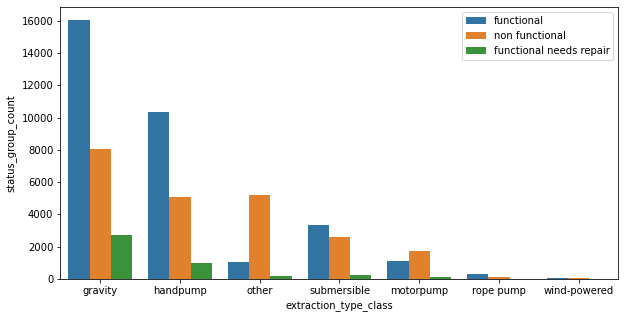

In [40]:
get_and_plot_groups(df_ana,'extraction_type_class','status_group',ax='ax1',Flen=10,Fhgt=5)

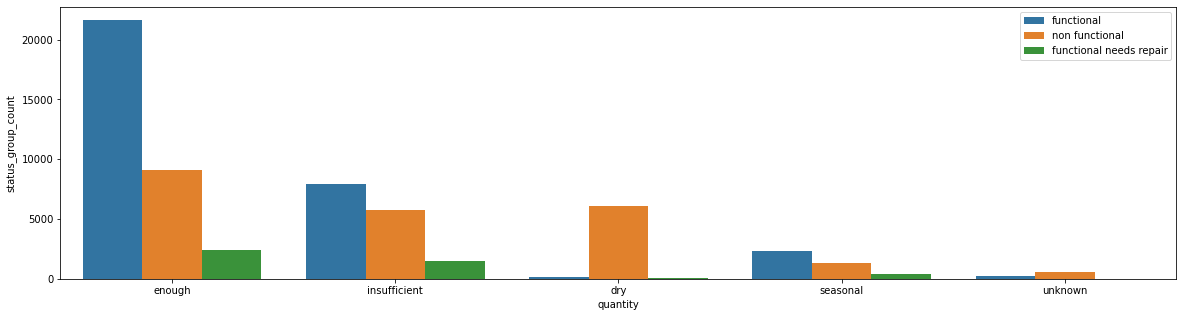

In [41]:
get_and_plot_groups(df_ana,'quantity','status_group',ax='ax2',Flen=20,Fhgt=5)

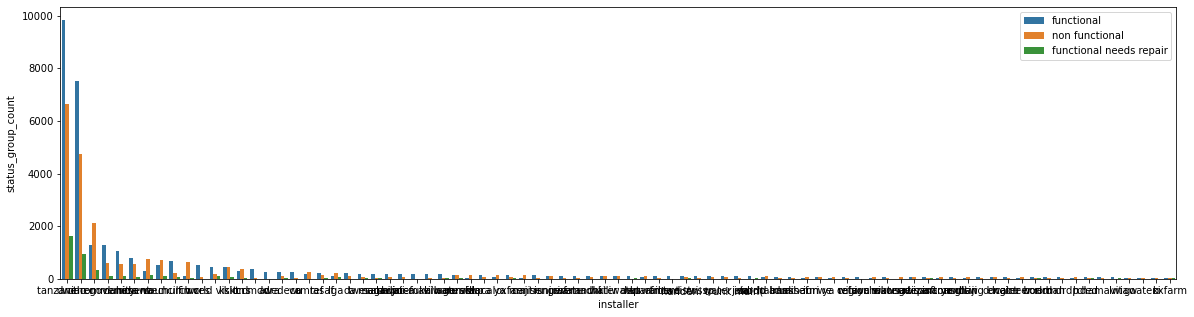

In [47]:
get_and_plot_groups(df_ana,'installer','status_group',ax='ax3',Flen=20,Fhgt=5)

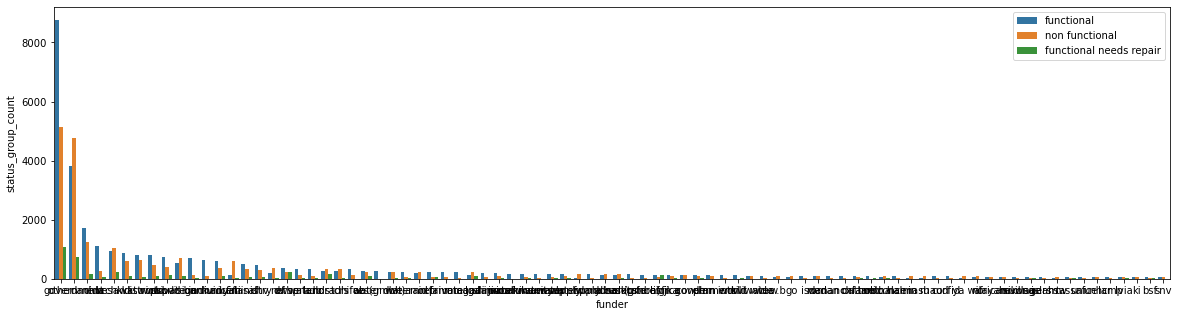

In [49]:
get_and_plot_groups(df_ana,'funder','status_group',ax='ax3',Flen=20,Fhgt=5)

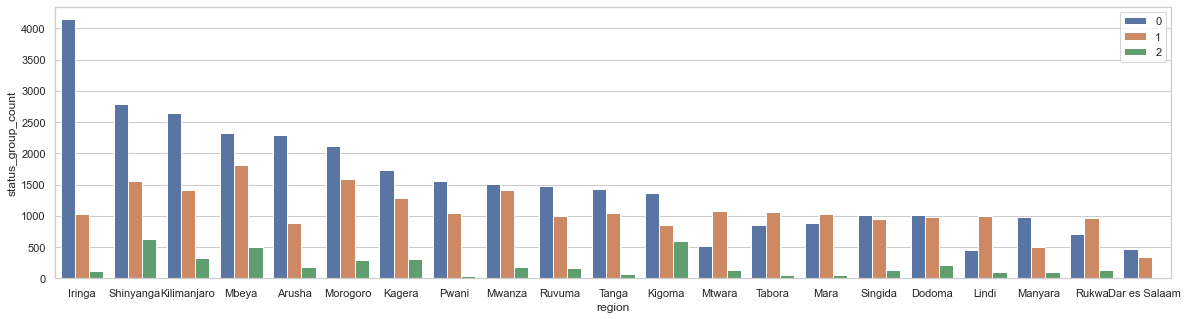

In [393]:
get_and_plot_groups(df_ana,'region','status_group',ax='ax2',Flen=20,Fhgt=5)

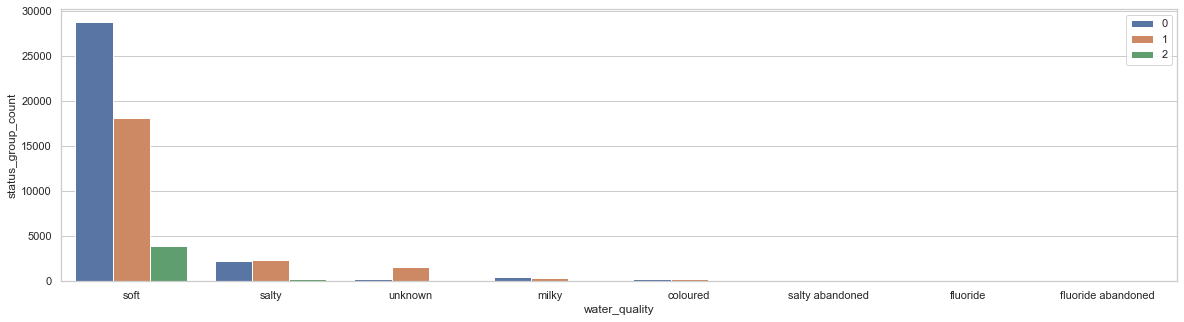

In [210]:
get_and_plot_groups(df_ana,'water_quality','status_group',ax='ax3',Flen=20,Fhgt=5)

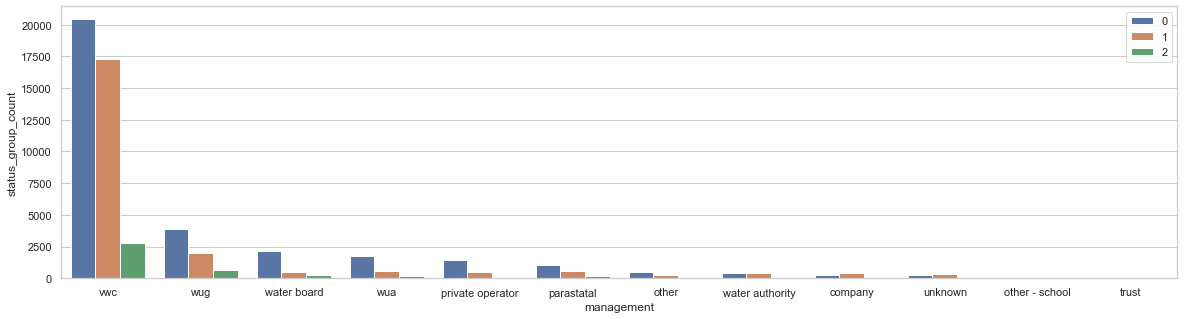

In [383]:
get_and_plot_groups(df_ana,'management','status_group',ax='ax3',Flen=20,Fhgt=5)

In [352]:
s1=pd.DataFrame(df_ana[['status_group','region','water_quality']]\
                .groupby(['status_group','region','water_quality'])\
                .agg(({'region': ['count']})))

In [353]:
s1

region
                                   count
status_group region water_quality       
0            Arusha coloured          14
                    fluoride         100
                    milky              2
                    salty              4
                    soft            2154
...                                  ...
2            Tabora milky              2
                    salty             11
                    soft              31
             Tanga  salty              5
                    soft              68

[327 rows x 1 columns]

In [354]:
s1.columns = ['_'.join(col) for col in s1.columns.values]
s1   = s1.reset_index()
s1

,status_group,region,water_quality,region_count
0,0,Arusha,coloured,14
1,0,Arusha,fluoride,100
2,0,Arusha,milky,2
3,0,Arusha,salty,4
4,0,Arusha,soft,2154
...,...,...,...,...
322,2,Tabora,milky,2
323,2,Tabora,salty,11
324,2,Tabora,soft,31
325,2,Tanga,salty,5


In [348]:
s1.columns

Index(['status_group', 'region', 'region_count'], dtype='object')

array([[<AxesSubplot:title={'center':'region_count'}>]], dtype=object)

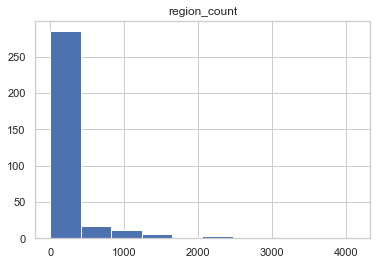

In [335]:
s1.hist()

In [356]:
s1.columns

Index(['status_group', 'region', 'water_quality', 'region_count'], dtype='object')

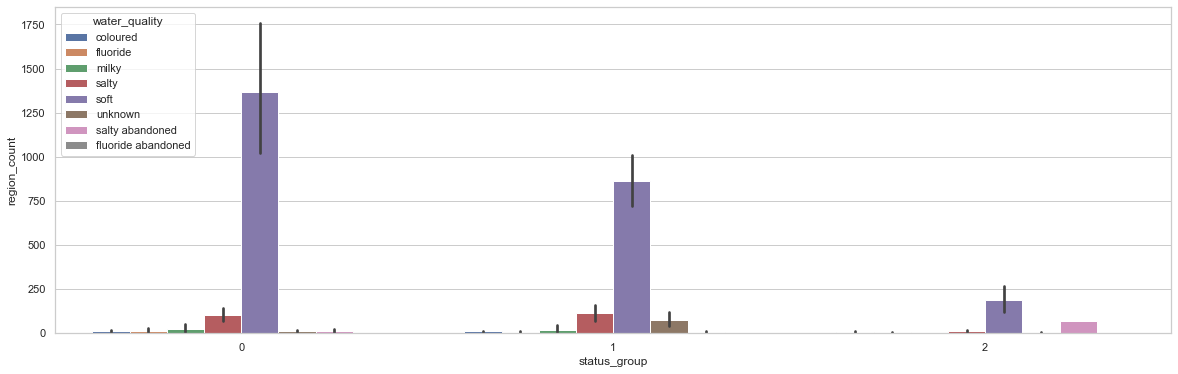

In [363]:
fig, ax = plt.subplots(figsize=(20,6))
ax=sns.barplot(x=s1.columns[0], y=s1.columns[3],data=s1,\
                    hue=s1.columns[2])


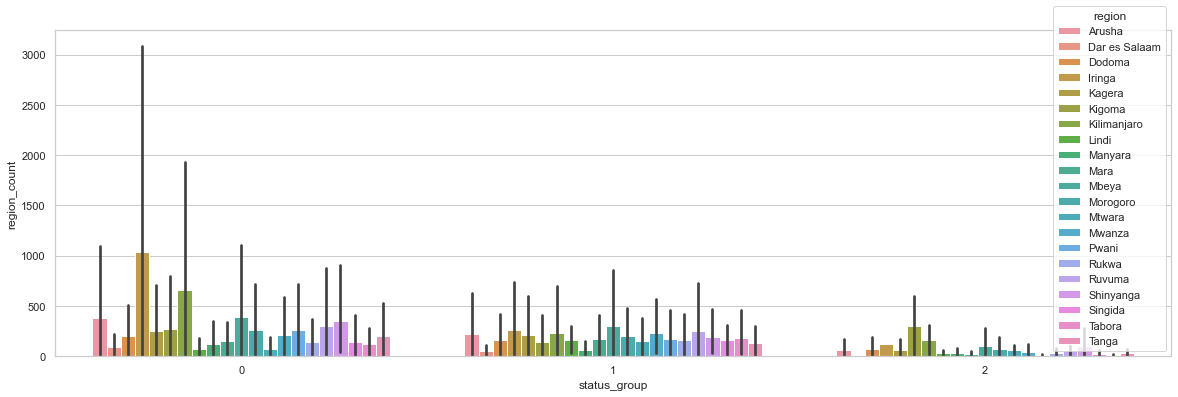

In [364]:
fig, ax = plt.subplots(figsize=(20,6))
ax=sns.barplot(x=s1.columns[0], y=s1.columns[3],data=s1,\
                    hue=s1.columns[1])



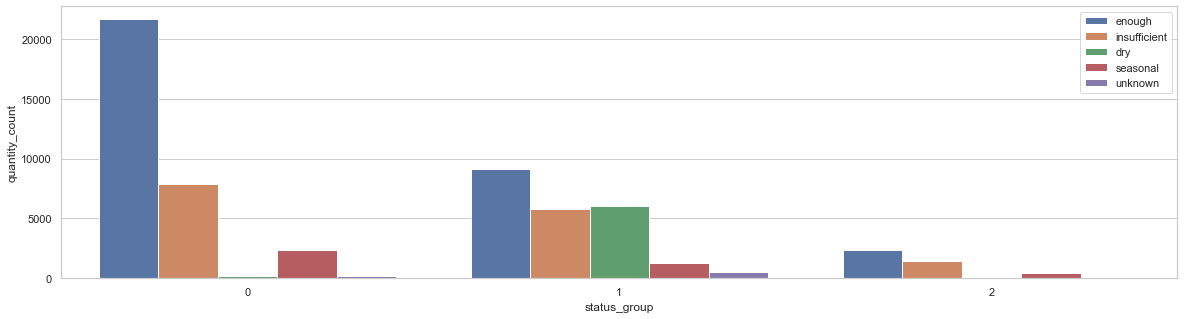

In [491]:
get_and_plot_groups(df_ana,'status_group','quantity',ax='ax3',Flen=20,Fhgt=5)

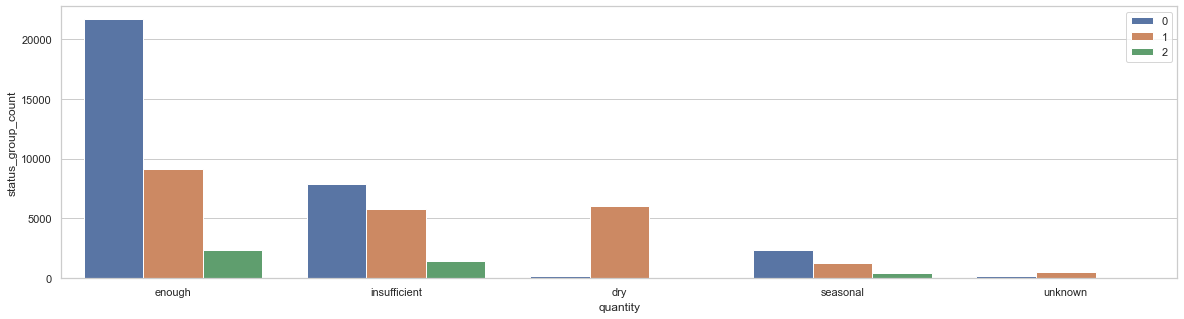

In [490]:
get_and_plot_groups(df_ana,'quantity','status_group',ax='ax3',Flen=20,Fhgt=5)

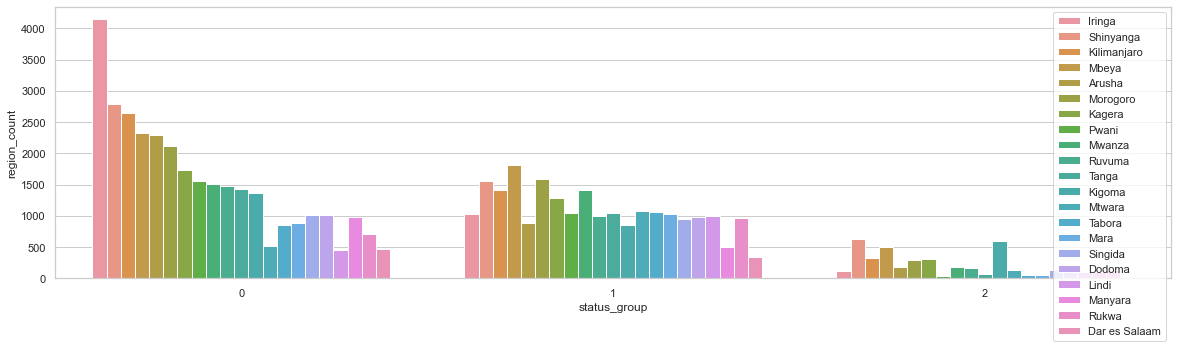

In [365]:
get_and_plot_groups(df_ana,'status_group','region',ax='ax3',Flen=20,Fhgt=5)

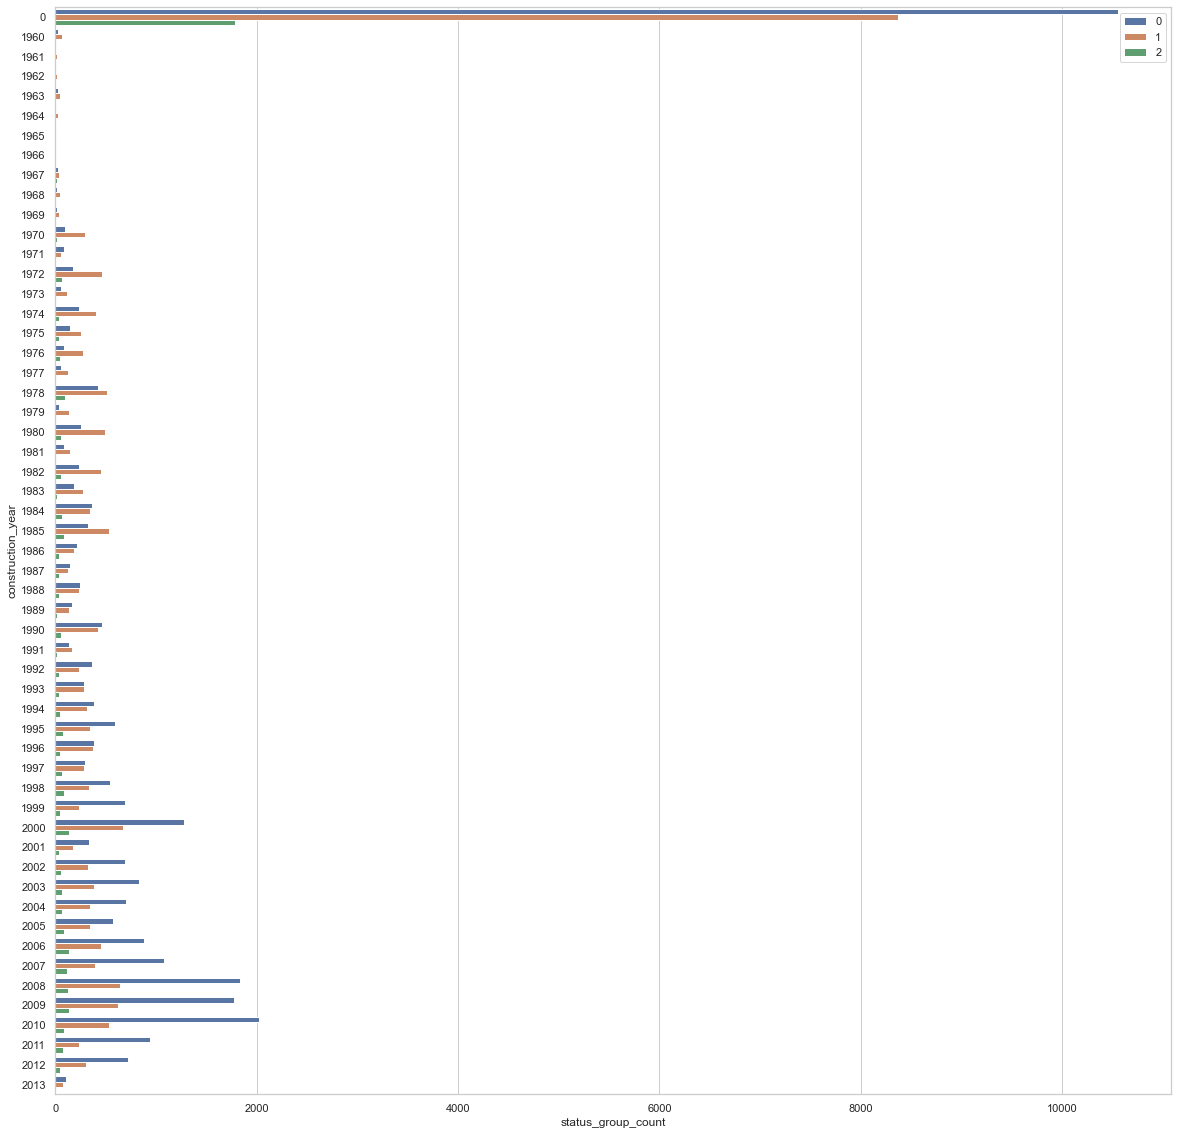

In [400]:
get_and_plot_groups(df_ana,'construction_year','status_group',ax='ax3',Flen=20,Fhgt=20,orient='h')

In [387]:
df_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [404]:
df_ana.region_code.value_counts().count()

27

In [403]:
df_ana.district_code.value_counts().count()

20

In [405]:
df_ana.region.value_counts().count()

21

,region,district_code
0,Iringa,5
1,Mara,2
2,Manyara,4
3,Mtwara,63
4,Kagera,1
...,...,...
59395,Kilimanjaro,5
59396,Iringa,4
59397,Mbeya,7
59398,Dodoma,4


No handles with labels found to put in legend.


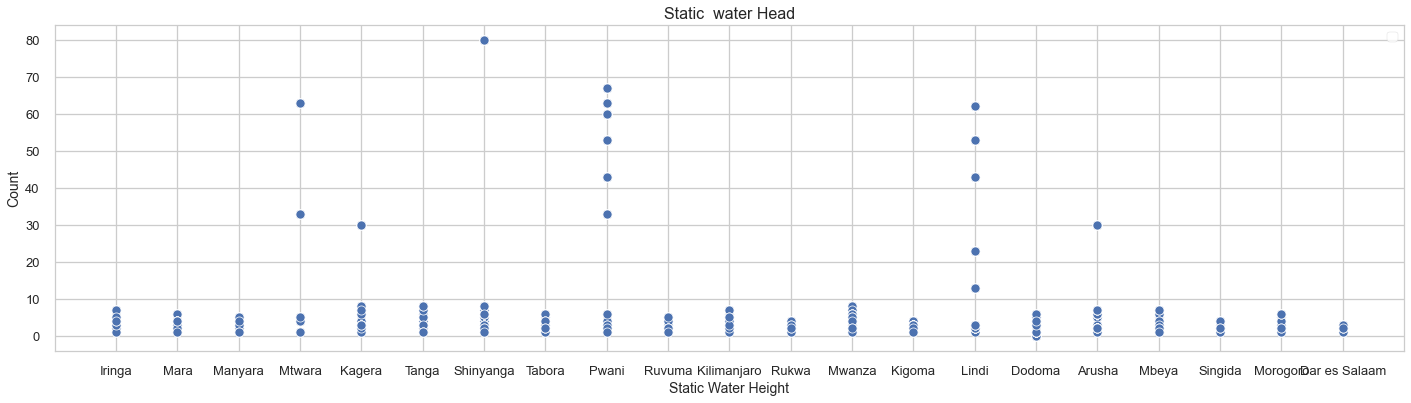

In [410]:
with plt.style.context('seaborn-talk'):
    fig, ax  = plt.subplots(figsize=(20, 6))

    sns.scatterplot(x = df_ana_new['region'], y=df_ana_new['district_code'])#bins=50, ax=ax, kde =True)
    #ax.xaxis.set_major_formatter(formatter)
    #plt.ylim(0, 7000)
    ax.set_title('Static  water Head', fontsize=16)
    ax.set_xlabel("Static Water Height", fontsize=14)
    ax.set_ylabel("Count", fontsize=14)
    #ax.vlines(df_ana_new['amount_tsh'].quantile(0.997), 0, 6900, color= 'orange', linestyle='--', label = "Top .3 % of the data")
    ax.legend(loc = 'upper right')
    fig.tight_layout();

In [428]:
df_lat=pd.DataFrame(df_ana_new[['region','longitude','latitude']]\
                    .groupby(['region']).agg({'latitude': ['median']}))

df_lat.columns = ['_'.join(col) for col in df_lat.columns.values]
df_lat.reset_index()

,region,latitude_median
0,Arusha,-3.331200
1,Dar es Salaam,-6.909450
2,Dodoma,-6.101568
3,Iringa,-9.078095
4,Kagera,-1.740384
5,Kigoma,-4.490551
6,Kilimanjaro,-3.313343
7,Lindi,-10.026820
8,Manyara,-4.224529
9,Mara,-1.771813


In [424]:
df_lat.columns

MultiIndex([('latitude', 'median')],
           )

In [430]:
df_long=pd.DataFrame(df_ana_new[['region','longitude']]\
                    .groupby(['region']).agg({'longitude': ['median']}))

df_long.columns = ['_'.join(col) for col in df_long.columns.values]
df_long.reset_index()

,region,longitude_median
0,Arusha,36.710782
1,Dar es Salaam,39.173977
2,Dodoma,35.972239
3,Iringa,34.775638
4,Kagera,31.357266
5,Kigoma,30.142206
6,Kilimanjaro,37.520942
7,Lindi,39.005079
8,Manyara,35.653555
9,Mara,34.139099


In [449]:
df_stat=pd.DataFrame(df_ana_new[['region','status_group']]\
                    .groupby(['region','status_group']).agg({'status_group': ['count']}))

df_stat.columns = ['_'.join(col) for col in df_stat.columns.values]
df_stat.reset_index()

,region,status_group,status_group_count
0,Arusha,0,2255
1,Arusha,1,880
2,Arusha,2,175
3,Dar es Salaam,0,456
4,Dar es Salaam,1,341
...,...,...,...
58,Tabora,1,1066
59,Tabora,2,45
60,Tanga,0,1433
61,Tanga,1,1038


In [451]:
df_stat.columns[0]

'status_group_count'

In [434]:
df_tmp=pd.merge(df_long,df_lat,how='inner',left_on='region', right_on='region')

In [435]:
df_tmp

,longitude_median,latitude_median
region,,
Arusha,36.710782,-3.331200
Dar es Salaam,39.173977,-6.909450
Dodoma,35.972239,-6.101568
Iringa,34.775638,-9.078095
Kagera,31.357266,-1.740384
Kigoma,30.142206,-4.490551
Kilimanjaro,37.520942,-3.313343
Lindi,39.005079,-10.026820
Manyara,35.653555,-4.224529


In [446]:
#df_region=pd.merge(df_stat,df_tmp,how='inner',left_on='region', right_on='region')
#df_region['status_group']=df_stat[(df_region['region']==df_stat['region'])]\
#['status_group']
#df_stat.columns[1]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [452]:
df_test=pd.DataFrame(df_ana[['region','status_group']].groupby(['region','status_group']).agg(({'status_group': ['count']})))
df_test

status_group
                                  count
region        status_group             
Arusha        0                    2294
              1                     881
              2                     175
Dar es Salaam 0                     461
              1                     341
...                                 ...
Tabora        1                    1066
              2                      45
Tanga         0                    1436
              1                    1038
              2                      73

[63 rows x 1 columns]

In [453]:
df_test.columns = ['_'.join(col) for col in df_test.columns.values]
#df_test.columns=['_'.join(col) if type(col) is tuple else col for col in df_test.columns.values]
df_test

status_group_count
region        status_group                    
Arusha        0                           2294
              1                            881
              2                            175
Dar es Salaam 0                            461
              1                            341
...                                        ...
Tabora        1                           1066
              2                             45
Tanga         0                           1436
              1                           1038
              2                             73

[63 rows x 1 columns]

In [454]:
df_test=df_test.reset_index()

In [457]:
df_test.columns

Index(['region', 'status_group', 'status_group_count'], dtype='object')

In [458]:
df_region=pd.merge(df_test,df_tmp,how='inner',left_on='region', right_on='region')
df_region

,region,status_group,status_group_count,longitude_median,latitude_median
0,Arusha,0,2294,36.710782,-3.331200
1,Arusha,1,881,36.710782,-3.331200
2,Arusha,2,175,36.710782,-3.331200
3,Dar es Salaam,0,461,39.173977,-6.909450
4,Dar es Salaam,1,341,39.173977,-6.909450
...,...,...,...,...,...
58,Tabora,1,1066,32.888731,-4.696374
59,Tabora,2,45,32.888731,-4.696374
60,Tanga,0,1436,38.494708,-5.014855
61,Tanga,1,1038,38.494708,-5.014855


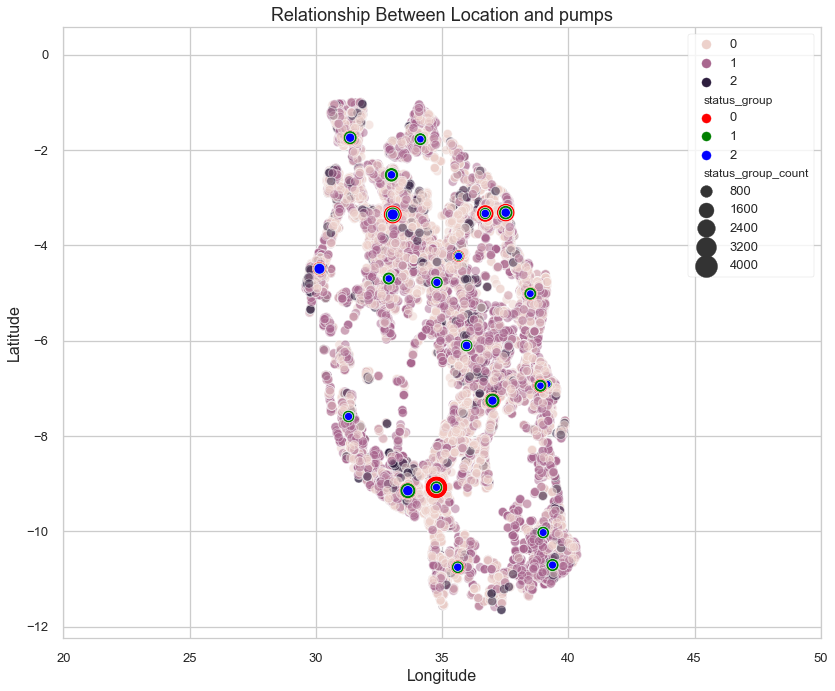

In [489]:
with plt.style.context('seaborn-talk'):
    
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.scatterplot(data=df_ana_new, x='longitude', y='latitude',  hue='status_group',alpha = .5, ax=ax)
    #[plt.text(x=row['lng'], y=row['lat'], s=row['city'], size='large', color='black') for k,row in dfzip_table.iterrows()]

    sns.scatterplot(data=df_region, x='longitude_median', y='latitude_median', hue='status_group',\
                    size='status_group_count',sizes=(50, 500), palette=['red','green','blue'],ax=ax) 
    #[plt.text(x=row['longitude_median'], y=row['latitude_median'], s=row['region'], family='sans-serif', size=15,color='blue') for k,row in df_region.iterrows()]
    
    #ax.axhline(y= 47.48, xmin=0, xmax=1, color='y', linestyle='--')
    #ax.axvline(x= -122.25, ymin=0.52, ymax=0.9, color='y', linestyle='--')
    #ax.axvline(x= -122.085, ymin=0.52, ymax=0.9, color='y', linestyle='--')
    #ax.axhline(y= 47.745, xmin=0, xmax=1, color='y', linestyle='--')
    #plt.xticks(np.arange(-122.6, -121.5, 0.1))
    
    plt.xlim(20, 50)
    ax.set_title('Relationship Between Location and pumps',fontsize=18)
    ax.set_xlabel("Longitude",fontsize=16)
    ax.set_ylabel("Latitude",fontsize=16)
    fig.tight_layout();
    
    #fig.savefig('./images/LocationMap.png', dpi=300);



In [493]:
df_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [497]:
df_ana.subvillage.value_counts()

Madukani      508
Shuleni       506
Majengo       502
Kati          373
Mtakuja       262
             ... 
Mwamwele        1
Nyamombi        1
Kyamtundu       1
Mtwivila B      1
Kiloleni B      1
Name: subvillage, Length: 19287, dtype: int64

In [502]:
df_ana.region.value_counts().count()

21

In [504]:
df_ana.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [503]:
dic={}
df_ana['age'] =
df_new['age'] = 2015 - df_new['yr_built'] # Set all age based on yr_built initially. 
mask = df_new['yr_renovated'] != 0 # create a mask for those rows with a value in yr_renovated.
df_new.loc[mask, "age"] = (2015 - df_new['yr_renovated'])

-12

In [505]:
nulls = ((df_ana.isnull().sum()*100) / len(df_ana)).sort_values(ascending=False)
nulls[nulls > 0]

scheme_management    6.526936
installer            6.153199
funder               6.119529
public_meeting       5.612795
permit               5.144781
subvillage           0.624579
dtype: float64

In [507]:
df_ana=df_ana.drop("id",axis=1)
df_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   basin                  59400 non-null  object 
 9   subvillage             59029 non-null  object 
 10  region                 59400 non-null  object 
 11  region_code            59400 non-null  int64  
 12  district_code          59400 non-null  int64  
 13  lga                    59400 non-null  object 
 14  ward                   59400 non-null  object 
 15  po

In [529]:
df_ana[(df_ana.isnull().sum(axis=1) >= 5)]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,extraction_type_class,management,management_group,payment,water_quality,quantity,source,source_class,waterpoint_type,status_group
11968,0.0,2013-03-14,NaN,1287,NaN,36.760284,-3.388704,Erasto,Pangani,Moivaro,...,gravity,unknown,unknown,unknown,unknown,unknown,unknown,unknown,communal standpipe,0
13754,0.0,2013-03-17,NaN,1035,NaN,36.091621,-3.554980,Trm,Internal,Makuyuni,...,other,unknown,unknown,unknown,unknown,unknown,machine dbh,groundwater,other,1
21690,0.0,2013-03-19,NaN,1289,NaN,36.189340,-3.422393,Mongoriondo,Internal,Engloriti,...,gravity,unknown,unknown,unknown,unknown,unknown,unknown,unknown,communal standpipe,0
27798,0.0,2013-03-19,NaN,1143,NaN,36.320944,-2.823900,Madukani,Internal,Madukani,...,other,unknown,unknown,unknown,unknown,unknown,unknown,unknown,hand pump,0
36032,0.0,2013-10-03,NaN,1304,NaN,36.900464,-3.112022,Zahanati Ngabobo,Internal,Tenki,...,gravity,unknown,unknown,unknown,unknown,unknown,spring,groundwater,communal standpipe,0
59344,0.0,2013-10-03,NaN,1303,NaN,36.900911,-3.111477,Pentecoste Swidish,Internal,Madukani,...,gravity,unknown,unknown,unknown,unknown,unknown,spring,groundwater,communal standpipe,0


In [514]:
data_cat = df_ana
data_cat = data_cat.apply(lambda x: x.astype('category').cat.codes)

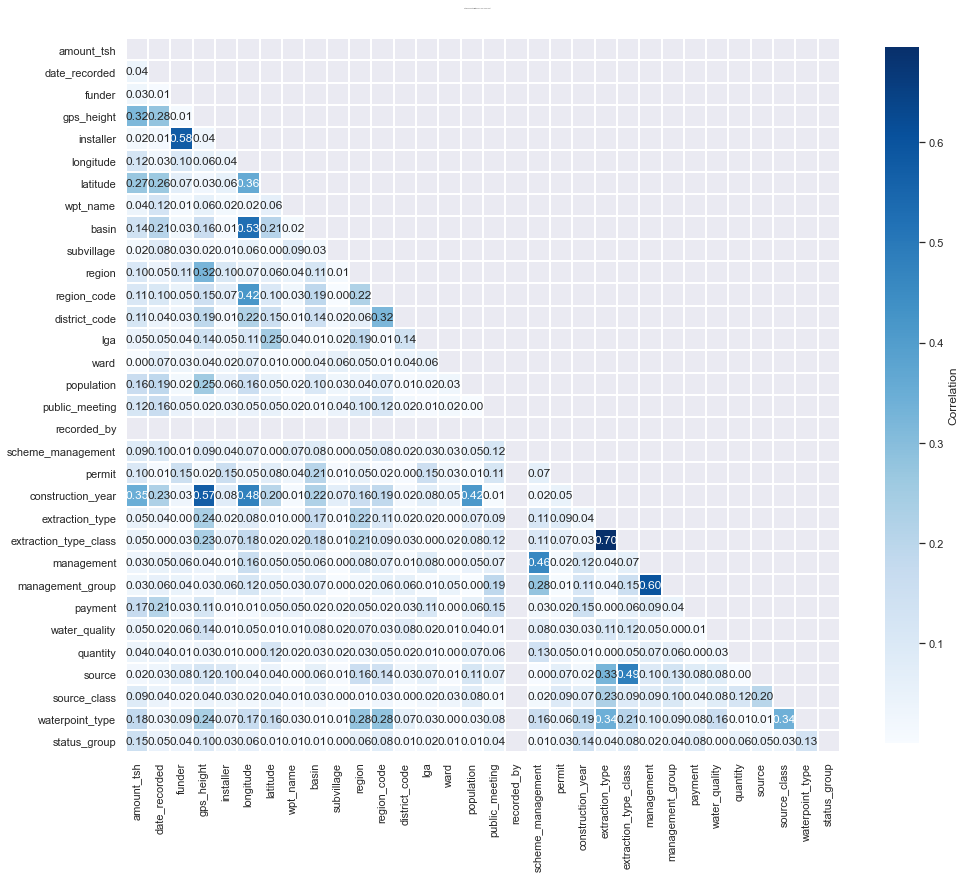

In [526]:
sns.set(font_scale=1)
corr = data_cat.corr().abs()

fig, ax=plt.subplots(figsize=(16,16))
matrix = np.triu(corr) # Getting the Upper Triangle of the correlation matrix
cbar_kws={"label": "Correlation", "shrink":0.8}
heatmap = sns.heatmap(data = corr, cmap='Blues', linewidths = 1, square= True,  ax=ax, annot=True, mask=matrix, fmt= ".2f", cbar_kws=cbar_kws) 
fig.suptitle('Heatmap of Correlation Between All Variables (Including Target)', fontsize=1, y=.84, x = .43, fontname='Arial');
dr
heatmap;

In [531]:
df_ana.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [532]:
df.scheme_name.value_counts()

K                       682
None                    644
Borehole                546
Chalinze wate           405
M                       400
                       ... 
Kasota                    1
Jilimri water supply      1
Welela Shallow well       1
upper Ruvuv               1
RC Msufi                  1
Name: scheme_name, Length: 2696, dtype: int64

In [533]:
df.scheme_name.value_counts().count()

2696

In [534]:
df_ana.scheme_management.value_counts().count()


12